<a href="https://colab.research.google.com/github/revanthsai87/Primary_secondary_Diabetic_Retinopathy/blob/main/Shapely%2B_SMOTE%2BNO_ensemble_models_%2Bpure_MOdel_with_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Authenticate Google Drive in case you need to import dataset from there.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd
#4/1AX4XfWiKGCSZqTbMDjmakHbrfcWLfFz-p5oSO59g6ddCfhAjH1YABV-QnJg
#Importing  dataset from Google Drive
# https://drive.google.com/file/d/1DIp2YKX0DdXtTbIcTOwY76gaRLlMS8We/view?usp=sharing
downloaded = drive.CreateFile({'id':"1DIp2YKX0DdXtTbIcTOwY76gaRLlMS8We"})   # replace the id with id of file you want to access
downloaded.GetContentFile('proc_data.csv')  
df = pd.read_csv('proc_data.csv')
df['dr_status'] = pd.factorize(df['dr_status'])[0]
#print(df)
# downloaded = drive.CreateFile({'id':"1UXl-ztH-RNvjOREU3U8eWZ7xKPSLZ2zL"})   # replace the id with id of file you want to access
# downloaded.GetContentFile('cat_or_cont.csv')  
# choices_df = pd.read_csv('cat_or_cont.csv')
# choices_df.drop('dr_status',axis=1,inplace=True)
# https://drive.google.com/file/d/1ogiaFB6XP2kIwhHAywerp_FoN1c-coL9/view?usp=sharing
downloaded = drive.CreateFile({'id':"1ogiaFB6XP2kIwhHAywerp_FoN1c-coL9"})   # replace the id with id of file you want to access
downloaded.GetContentFile('pri_sec.csv')  
choices_df = pd.read_csv('pri_sec.csv')
#print("asdasdads")
#print(df.columns)
#choices_df.drop('dr_status',axis=1,inplace=True)
df.drop('stdr',axis=1,inplace=True)
#df.drop('ffa',axis=1,inplace=True)
df.drop('literacy',axis=1,inplace=True)
df.drop('ses',axis=1,inplace=True)
df.drop('diabetic_status',axis=1,inplace=True)
df.drop('dm_dur',axis=1,inplace=True)
df.drop('diet_control',axis=1,inplace=True)
df.drop('oha',axis=1,inplace=True)
df.drop('cv',axis=1,inplace=True)
df.drop('ffa',axis=1,inplace=True)
df.drop('csme',axis=1,inplace=True)
df.drop('fbs_cat',axis=1,inplace=True)
df.drop('fbs',axis=1,inplace=True)
df.drop('kd_nd',axis=1,inplace=True)
df.drop('smoking_status',axis=1,inplace=True)
df.drop('typeofdm',axis=1,inplace=True)
df.drop('dme_odpresentabsent',axis=1,inplace=True)
df.drop('csme_ospresentabsent',axis=1,inplace=True)
df.drop('urineforproteinuria',axis=1,inplace=True)
# df.drop('age',axis=1,inplace=True)
df.drop('bmi',axis=1,inplace=True)
df.drop('kd_nd_1',axis=1,inplace=True)
df.drop('sbp',axis=1,inplace=True)
df.drop('dbp',axis=1,inplace=True)
df.drop('hba1c',axis=1,inplace=True)
df.drop('hba1c_cat',axis=1,inplace=True)
df.drop('restype',axis=1,inplace=True)
df.drop('sbp_cat_new',axis=1,inplace=True)
df.drop('dbp_cat_new',axis=1,inplace=True)
df.drop('dbp_cat',axis=1,inplace=True)
df.drop('pp',axis=1,inplace=True)
df.drop('map',axis=1,inplace=True)
df.drop('pp_cat',axis=1,inplace=True)
df.drop('map_cat',axis=1,inplace=True)
df.drop('htn_new',axis=1,inplace=True)
df.drop('bmi_cat_new',axis=1,inplace=True)

se = df.to_numpy()
X = se[:,0:-1]
y = se[:,-1]
df.drop('dr_status',axis=1,inplace=True)
#print(df)
#for col in df.columns:
#    print(col)
print(X.shape)
print(y.shape)

(3990, 9)
(3990,)



***Finding Primary and Secondary Attributes***

In [ ]:
pri_cols = []
sec_cols = []
for i in range(0,X.shape[1]):
  curr_ch = choices_df[df.columns[i]][0]
  if curr_ch==1:
    pri_cols.append(i)
  else:
    sec_cols.append(i)
#print(pri_cols)
print("Primary Attributes----", df.columns[pri_cols])
print("Secodary Attributes----",df.columns[sec_cols])

Primary Attributes---- Index(['diabetes mellitus duration', 'insulin treatment',
       'hypertension history', 'fasting plasma glucose',
       'systolic blood pressure status', 'glycosylated hemoglobin status'],
      dtype='object')
Secodary Attributes---- Index(['Gender', 'Age status', 'Bmi status'], dtype='object')


**List of all primary and secondary attributes**

In [ ]:
#Storing the list of attribute names.
list_col = list(df.columns)[:]
ls = []
for i in pri_cols:
  ls.append(list_col[i])
for i in sec_cols:
  ls.append(list_col[i])
list_col = ls
print(list_col)

['diabetes mellitus duration', 'insulin treatment', 'hypertension history', 'fasting plasma glucose', 'systolic blood pressure status', 'glycosylated hemoglobin status', 'Gender', 'Age status', 'Bmi status']


**CORRELATION MATRIX**

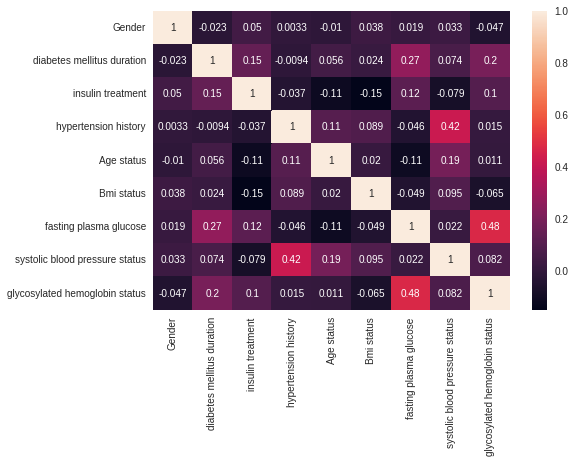

In [ ]:
import seaborn as sns
cf = df.corr()
sns.heatmap(cf,annot=True)

**STORING MODEL NAMES**

In [ ]:
Model_Names=["Decision Tree","SVM","KNN","Logistic Regression","Naive Bayes"]

**SHAPELY INSTALL**

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**IMPORTING ALL LIBRARIES**

In [ ]:
#Import all necessary libraries
import sys
from collections import Counter 
from scipy.sparse import csgraph
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import pyplot
import random
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use('seaborn')

**SMOTEEENN CODE AS THIS HELPS IN SPLITING DATA SET CLOSE TO EQUAL**

In [ ]:
c1=0
c2=1
while abs(c2-c1)>0:
  c1=0
  c2=0
  smt = SMOTEENN(random_state=42)
  X, y = smt.fit_resample(X, y)
  for z in y:
     if z==0:
        c1+=1
     else:
        c2+=1
       
print("Count of Zeros",c1)
print("Count of ones",c2)        

Count of Zeros 1945
Count of ones 1945


**SPLITTING DATA IN TO TRAIN AND TEST**

In [ ]:
#Splitting dataset into training and test sets.
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size = 0.70,random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size = 0.3,random_state=0)

**CALCULATING SHAPELY VALUES**

In [ ]:



# # Set up data
# dtrain = xgb.DMatrix(X_train, label=Y_train)
# dval = xgb.DMatrix(X_val, label=Y_val)

# # Parameters
# param = {
#     'max_depth' : 10,
#     'objective': 'reg:squarederror',
#     'nthread': 4
# }
# evallist = [(dtrain, 'train'), (dval, 'val')]
# num_round = 50

# # Train
# model = xgb.train(param, dtrain, num_round, evallist, verbose_eval=False)
# # Calculate performance
# mean = np.mean(Y_train)
# base_mse = np.mean((mean - Y_test) ** 2)
# mse = np.mean((model.predict(xgb.DMatrix(X_test)) - Y_test) ** 2)

# print('Base rate MSE = {:.2f}'.format(base_mse))
# print('Model MSE = {:.2f}'.format(mse))

# # Setup and calculate
# imputer = sage.MarginalImputer(model, X_test[:10])
# estimator = sage.PermutationEstimator(imputer, 'mse')
# sage_values = estimator(X_test, Y_test)

# feature_names = df.columns.tolist()[:]
# print(sage_values)
# # Plot results
# sage_values.plot(feature_names,figsize=(50, 40), capsize=20,label_size=26, return_fig=False)


import shap  # package used to calculate Shap values
shap.initjs()
data = shap.kmeans(X_train, 100)
DT = DecisionTreeClassifier(splitter='best', random_state=0, min_samples_split=2, max_features='sqrt', max_depth=9, criterion='gini')
DT.fit(X_train,y_train)
# use Kernel SHAP to explain test set predictions
explainer_dt = shap.KernelExplainer(DT.predict_proba, data)
shap_values_dt = explainer_dt.shap_values(X_test, nsamples=100)
# print(shap_values_dt)

svm = SVC(tol=0.0001, random_state=0, kernel='poly', gamma=0.1, degree=2, class_weight='balanced', C=10, probability=True)
svm.fit(X_train,y_train)
# use Kernel SHAP to explain test set predictions
explainer_svm = shap.KernelExplainer(svm.predict_proba, data)
shap_values_svm = explainer_svm.shap_values(X_test, nsamples=100)
# print(shap_values_svm)

KNN = KNeighborsClassifier(weights='uniform', p=2, n_neighbors=20, metric='manhattan', leaf_size=49, algorithm='ball_tree')
KNN.fit(X_train,y_train)
# use Kernel SHAP to explain test set predictions
explainer_knn = shap.KernelExplainer(KNN.predict_proba, data)
shap_values_knn = explainer_knn.shap_values(X_test, nsamples=100)
# print(shap_values_knn)

   
LR = LogisticRegression(warm_start=True, tol=0.009, solver='saga', random_state=0, penalty='none', multi_class='auto', 
                max_iter=500, intercept_scaling=70, fit_intercept=True, dual=False, class_weight='None', C=1)
LR.fit(X_train,y_train)
explainer_lr = shap.KernelExplainer(LR.predict_proba, data)
shap_values_lr = explainer_lr.shap_values(X_test, nsamples=100)
# print(shap_values_lr)

NB = GaussianNB(var_smoothing=1e-10)
NB.fit(X_train,y_train)
explainer_nb = shap.KernelExplainer(NB.predict_proba, data)
shap_values_nb = explainer_nb.shap_values(X_test, nsamples=100)
# print(shap_values_nb)




  0%|          | 0/351 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: 

  0%|          | 0/351 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: 

  0%|          | 0/351 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: 

  0%|          | 0/351 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: 

  0%|          | 0/351 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: 

**HELPING CODE FOR SHAPELY VALUE CALCULATION**

In [ ]:
vals_dt = np.abs(shap_values_dt).mean(0)
vals_svm = np.abs(shap_values_svm).mean(0)
vals_knn = np.abs(shap_values_knn).mean(0)
vals_lr = np.abs(shap_values_lr).mean(0)
vals_nb = np.abs(shap_values_nb).mean(0)


---
PRIMARY ATTRIBUTE CALCULATION

---






**RANKING PRIMARY ATTRIBUTES USING SHAPELY**

In [ ]:
X_test_df=pd.DataFrame(X_test[:,pri_cols],columns=df.columns[pri_cols])

**CALCULATING SHAPELY VALUES FOR PRIMARY**

In [ ]:

vals_dt_pri=vals_dt[:,pri_cols]
shap_importance_dt_pri = pd.DataFrame(list(zip(X_test_df.columns, sum(vals_dt_pri))), columns=['col_name','shap_importance_vals'])
shap_importance_dt_pri.sort_values(by=['shap_importance_vals'], ascending=False, inplace=True)
#print(shap_importance_dt)

vals_svm_pri=vals_svm[:,pri_cols]
shap_importance_svm_pri = pd.DataFrame(list(zip(X_test_df.columns, sum(vals_svm_pri))), columns=['col_name','shap_importance_vals'])
shap_importance_svm_pri.sort_values(by=['shap_importance_vals'], ascending=False, inplace=True)
#print("232",shap_importance_svm)

vals_knn_pri=vals_knn[:,pri_cols]
shap_importance_knn_pri = pd.DataFrame(list(zip(X_test_df.columns, sum(vals_knn_pri))), columns=['col_name','shap_importance_vals'])
shap_importance_knn_pri.sort_values(by=['shap_importance_vals'], ascending=False, inplace=True)
#print("addas",shap_importance_dt)

vals_lr_pri=vals_lr[:,pri_cols]
shap_importance_lr_pri = pd.DataFrame(list(zip(X_test_df.columns, sum(vals_lr_pri))), columns=['col_name','shap_importance_vals'])
shap_importance_lr_pri.sort_values(by=['shap_importance_vals'], ascending=False, inplace=True)
#print("dsdfasa",shap_importance_lr)

vals_nb_pri=vals_nb[:,pri_cols]
shap_importance_nb_pri = pd.DataFrame(list(zip(X_test_df.columns, sum(vals_nb_pri))), columns=['col_name','shap_importance_vals'])
shap_importance_nb_pri.sort_values(by=['shap_importance_vals'], ascending=False, inplace=True)
#print("aaaa",shap_importance_nb)


**RANKING THE PRIMARY ATTRIBUTES**

In [ ]:
models_pri=[]
rank_attr_dt_pri=list(shap_importance_dt_pri.index)
models_pri.append(rank_attr_dt_pri)

rank_attr_svm_pri = list(shap_importance_svm_pri.index)
models_pri.append(rank_attr_svm_pri)

rank_attr_knn_pri = list(shap_importance_knn_pri.index)
models_pri.append(rank_attr_knn_pri)

rank_attr_lr_pri = list(shap_importance_lr_pri.index)
models_pri.append(rank_attr_lr_pri)

rank_attr_nb_pri = list(shap_importance_nb_pri.index)   
models_pri.append(rank_attr_nb_pri)
for x in range(len(models_pri)):
  print(Model_Names[x],models_pri[x])

Decision Tree [5, 0, 4, 3, 1, 2]
SVM [5, 0, 4, 2, 1, 3]
KNN [5, 0, 4, 3, 1, 2]
Logistic Regression [5, 4, 1, 3, 0, 2]
Naive Bayes [5, 3, 4, 0, 1, 2]


**ACTUAL INDICES OF PRIMARY ATTRIBUTES RANKING WITH RESPECT TO DATA SET**

In [ ]:
rank_actual_ind_pri=[]
for x in range(len(models_pri)):
  t=[]
  #print(models_pri[x])
  #print("--------")
  for i in range(len(models_pri[x])):
     #print(models_pri[x][i])
     #print(models_pri[x][i])
     t.append(pri_cols[models_pri[x][i]])
  rank_actual_ind_pri.append(t)
for x in range(len(rank_actual_ind_pri)):
  print(Model_Names[x],rank_actual_ind_pri[x])
#print(rank_actual_ind_pri) #Rank wise order of primary attibutes with actual indices.

Decision Tree [8, 1, 7, 6, 2, 3]
SVM [8, 1, 7, 3, 2, 6]
KNN [8, 1, 7, 6, 2, 3]
Logistic Regression [8, 7, 2, 6, 1, 3]
Naive Bayes [8, 6, 7, 1, 2, 3]


**CALCULATIING WEIGHTS OF PRIMARY ATTRIBUTES**

In [ ]:
models_weights_pri=[]
num_attrs = len(models_pri[0])
dt_weights_pri = np.zeros(num_attrs)
i = 1
for r in rank_attr_dt_pri:
    dt_weights_pri[r] = num_attrs - i
    i+=1   
models_weights_pri.append(dt_weights_pri)           
svm_weights_pri = np.zeros(num_attrs)
i = 1
for r in rank_attr_svm_pri:
    svm_weights_pri[r] = num_attrs - i
    i+=1
models_weights_pri.append(svm_weights_pri)    
knn_weights_pri = np.zeros(num_attrs)
i = 1
for r in rank_attr_knn_pri:
    knn_weights_pri[r] = num_attrs - i
    i+=1
models_weights_pri.append(knn_weights_pri)    
lr_weights_pri = np.zeros(num_attrs)
i = 1
for r in rank_attr_lr_pri:
    lr_weights_pri[r] = num_attrs - i
    i+=1
models_weights_pri.append(lr_weights_pri)    
nb_weights_pri = np.zeros(num_attrs)
i = 1
for r in rank_attr_nb_pri:
    nb_weights_pri[r] = num_attrs - i
    i+=1
models_weights_pri.append(nb_weights_pri)    
for x in range(len(models_weights_pri)):
  print(Model_Names[x],models_weights_pri[x])

Decision Tree [4. 1. 0. 2. 3. 5.]
SVM [4. 1. 2. 0. 3. 5.]
KNN [4. 1. 0. 2. 3. 5.]
Logistic Regression [1. 3. 0. 2. 4. 5.]
Naive Bayes [2. 1. 0. 4. 3. 5.]




---

SECONDARY ATTRIBUTE CALCULATION

---



**RANKING SECONDARY ATTRIBUTES USING SHAPELY**

In [ ]:
X_test_df1=pd.DataFrame(X_test[:,sec_cols],columns=df.columns[sec_cols])

**CALCULATING SHAPELY VALUES FOR SECONDARY**

In [ ]:

vals_dt_sec=vals_dt[:,sec_cols]
shap_importance_dt_sec = pd.DataFrame(list(zip(X_test_df1.columns, sum(vals_dt_sec))), columns=['col_name','shap_importance_vals'])
shap_importance_dt_sec.sort_values(by=['shap_importance_vals'], ascending=False, inplace=True)
#print(shap_importance_dt)

vals_svm_sec=vals_svm[:,sec_cols]
shap_importance_svm_sec = pd.DataFrame(list(zip(X_test_df1.columns, sum(vals_svm_sec))), columns=['col_name','shap_importance_vals'])
shap_importance_svm_sec.sort_values(by=['shap_importance_vals'], ascending=False, inplace=True)
#print("232",shap_importance_svm)

vals_knn_sec=vals_knn[:,sec_cols]
shap_importance_knn_sec = pd.DataFrame(list(zip(X_test_df1.columns, sum(vals_knn_sec))), columns=['col_name','shap_importance_vals'])
shap_importance_knn_sec.sort_values(by=['shap_importance_vals'], ascending=False, inplace=True)
#print("addas",shap_importance_dt)

vals_lr_sec=vals_lr[:,sec_cols]
shap_importance_lr_sec = pd.DataFrame(list(zip(X_test_df1.columns, sum(vals_lr_sec))), columns=['col_name','shap_importance_vals'])
shap_importance_lr_sec.sort_values(by=['shap_importance_vals'], ascending=False, inplace=True)
#print("dsdfasa",shap_importance_lr)

vals_nb_sec=vals_nb[:,sec_cols]
shap_importance_nb_sec = pd.DataFrame(list(zip(X_test_df1.columns, sum(vals_nb_sec))), columns=['col_name','shap_importance_vals'])
shap_importance_nb_sec.sort_values(by=['shap_importance_vals'], ascending=False, inplace=True)
#print("aaaa",shap_importance_nb)


**RANKING THE SECONDARY ATTRIBUTES**

In [ ]:
models_sec=[]
rank_attr_dt_sec=list(shap_importance_dt_sec.index)
models_sec.append(rank_attr_dt_sec)

rank_attr_svm_sec = list(shap_importance_svm_sec.index)
models_sec.append(rank_attr_svm_sec)

rank_attr_knn_sec = list(shap_importance_knn_sec.index)
models_sec.append(rank_attr_knn_sec)

rank_attr_lr_sec = list(shap_importance_lr_sec.index)
models_sec.append(rank_attr_lr_sec)

rank_attr_nb_sec = list(shap_importance_nb_sec.index)   
models_sec.append(rank_attr_nb_sec)
for x in range(len(models_sec)):
  print(Model_Names[x],models_sec[x])

Decision Tree [0, 2, 1]
SVM [0, 2, 1]
KNN [2, 0, 1]
Logistic Regression [0, 1, 2]
Naive Bayes [0, 2, 1]


**ACTUAL INDICES OF SECONDARY ATTRIBUTES RANKING WITH RESPECT TO DATA SET**

In [ ]:
rank_actual_ind_sec=[]
for x in range(len(models_sec)):
  t=[]
  for i in range(len(models_sec[x])):
     t.append(sec_cols[models_sec[x][i]])
  rank_actual_ind_sec.append(t)
for x in range(len(rank_actual_ind_sec)):
  print(Model_Names[x],rank_actual_ind_sec[x])
#print(rank_actual_ind_pri) #Rank wise order of primary attibutes with actual indices.

Decision Tree [0, 5, 4]
SVM [0, 5, 4]
KNN [5, 0, 4]
Logistic Regression [0, 4, 5]
Naive Bayes [0, 5, 4]


**CALCULATIING WEIGHTS OF SECONDARY ATTRIBUTES**

In [ ]:
models_weights_sec=[]
num_attrs = len(models_sec[0])
dt_weights_sec = np.zeros(num_attrs)
i = 1
for r in rank_attr_dt_sec:
    dt_weights_sec[r] = num_attrs - i
    i+=1   
models_weights_sec.append(dt_weights_sec)           
svm_weights_sec = np.zeros(num_attrs)
i = 1
for r in rank_attr_svm_sec:
    svm_weights_sec[r] = num_attrs - i
    i+=1
models_weights_sec.append(svm_weights_sec)    
knn_weights_sec = np.zeros(num_attrs)
i = 1
for r in rank_attr_knn_sec:
    knn_weights_sec[r] = num_attrs - i
    i+=1
models_weights_sec.append(knn_weights_sec)    
lr_weights_sec = np.zeros(num_attrs)
i = 1
for r in rank_attr_lr_sec:
    lr_weights_sec[r] = num_attrs - i
    i+=1
models_weights_sec.append(lr_weights_sec)    
nb_weights_sec = np.zeros(num_attrs)
i = 1
for r in rank_attr_nb_sec:
    nb_weights_sec[r] = num_attrs - i
    i+=1
models_weights_pri.append(nb_weights_sec)    
for x in range(len(models_weights_sec)):
  print(Model_Names[x],models_weights_sec[x])

Decision Tree [2. 0. 1.]
SVM [2. 0. 1.]
KNN [1. 0. 2.]
Logistic Regression [2. 1. 0.]


**CODE TO FIND BEST PRIMARY AND SECONDARY ATTRIBUTE COMBINATION FOR ALL MODELS**

In [ ]:
pri_sec_combo={} #Dict to store Combinations of primary and secondary
models_list={} # Dictonary to carry Different Models
best_sec={} #Dict To store Best Secondary if primary+secondary is not greater than primary alone.
models_list["Decision Tree"]= DecisionTreeClassifier(splitter='best', random_state=0, min_samples_split=2, max_features='sqrt', max_depth=9, criterion='gini')
models_list["SVM"]= SVC(tol=0.01, random_state=0, kernel='poly', gamma=0.01, degree=4, class_weight='balanced', C=15,probability=True)
models_list["KNN"]=KNeighborsClassifier(weights='uniform', p=2, n_neighbors=20, metric='manhattan', leaf_size=49, algorithm='ball_tree')
models_list["Logistic Regression"]=LogisticRegression(tol=0.009, solver='saga', random_state=0, penalty='none', multi_class='auto', 
                max_iter=500, intercept_scaling=70, fit_intercept=True, dual=False, class_weight='None', C=1)
models_list["Naive Bayes"]=GaussianNB(var_smoothing=1e-10)
#Loop through all models and find best combinations for each model.
k=0
for m in models_list:
  
   combo= {} #dict to store best combination for each model.
   sec_attr={}
   #prev_s1=-1.00 #variable to store cv score for each model.
   #print(m)
   #print(k)
   #print(m)
   for i in rank_actual_ind_pri[k]:
      #print("pri",i)
      temp_sec=-0.00
      combo[df.columns[i]]=-1 #initalize new entry for primary attribute
      n_t=pd.DataFrame(X_train[:,i]) #training data for corresponding primary attribute.
      X_t_train=n_t.to_numpy()
      prev_s1=cross_val_score(models_list[m], X_t_train, y_train, cv=5,scoring='roc_auc').mean() #reinitalize value of prev_s1 for finding max cv score.
      #print("1----->",prev_s1)
     # print(rank_actual_ind_sec[0])
      for j in rank_actual_ind_sec[k]:
        # print("sec",j)
         n1=pd.DataFrame(X_train[:,i])
         n1[1]=X_train[:,j]
         X1_train=n1.to_numpy() #Combination of each primary and secondary attribute.
         score1 = cross_val_score(models_list[m], X1_train, y_train, cv=5,scoring='roc_auc').mean()
         if score1>temp_sec:
            temp_sec=score1
            sec_attr[df.columns[i]]=df.columns[j]
         #print(score1)
         if prev_s1 < score1:
            prev_s1=score1
            combo[df.columns[i]] = df.columns[j]
   k+=1
   pri_sec_combo[m]=combo #Add Best Combinations found for each model.   
   best_sec[m]=sec_attr        
for i in pri_sec_combo:
   print(i,"-- ",pri_sec_combo[i] )

Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Gender', 'systolic blood pressure status': 'Bmi status', 'fasting plasma glucose': 'Bmi status', 'insulin treatment': 'Bmi status', 'hypertension history': 'Bmi status'}
SVM --  {'glycosylated hemoglobin status': -1, 'diabetes mellitus duration': 'Age status', 'systolic blood pressure status': 'Bmi status', 'hypertension history': 'Bmi status', 'insulin treatment': 'Bmi status', 'fasting plasma glucose': 'Gender'}
KNN --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Bmi status', 'systolic blood pressure status': 'Bmi status', 'fasting plasma glucose': 'Bmi status', 'insulin treatment': 'Bmi status', 'hypertension history': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender', 'systolic blood pressure status': 'Gender', 'insulin treatment': 'Gender', 'fasting plasma glucose': 'Bmi status', 'diabetes mellitus duration': 'Gender'

**HELPING FUNCTIONS TO CALCULATE METRICS**

In [ ]:
# Code to store Model names as a list instead of dict.
model_list_=[]
for x in models_list:
  model_list_.append(x)

In [ ]:
def confusion_metrics (conf_matrix,find):
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # print('True Positives:', TP)
    # print('True Negatives:', TN)
    # print('False Positives:', FP)
    # print('False Negatives:', FN)
    
    # calculate accuracy
    if(find=="accuracy"):
         return  (float (TP+TN) / float(TP + TN + FP + FN))

    
    # calculate mis-classification
    #conf_misclassification = 1- conf_accuracy
    # calculate the sensitivity
    elif(find=="sensitivity"):
              return  (TP / float(TP + FN))
    # calculate the specificity
    elif(find=="specificity"):
              return  (TN / float(TN + FP))
    
    # calculate precision
    elif(find =="precision"):
           return  (TN / float(TN + FP))
    elif(find =="fpr"):
           return  (FP / float(TN + FP))           
    else:
      return -1

In [ ]:
def Calculate_metrics(metric_tofind):
  _score_combo={} #dict to store the primary and secondary attributes till we find best value.
  combo_ind_={} # dict to store all best combinations till the best value.
  _scores_values=[] #Best Values stored for Drawing Graph
  X2_test = np.ndarray([]) # Testing Data
  X2_train=np.ndarray([]) #Training data
  Graph_attributes=[0,1,2,3,4,5]
  for i in pri_sec_combo:
    temp= -1.0 # Temporary variable for finding max metric value.
    _combo=[0,0] # To store best pri sec combo for metric
    X2_train = np.ndarray([])
    X2_test=np.ndarray([])
    graph_=[] #List to store all values of metric.
    #print(i)
    for x in pri_sec_combo[i]:
      #print(x,pri_sec_combo[i][x])
      n1=pd.DataFrame(X_test[:,df.columns.get_loc(x)]) #Adding Test Data for respective Combinations primary
      if pri_sec_combo[i][x]!=-1: # case to handle when there is only primary attribute 
           n1[1]=X_test[:,df.columns.get_loc(pri_sec_combo[i][x])]# Adding Test data for respective secondary
      n2=pd.DataFrame(X_train[:,df.columns.get_loc(x)])  #Adding Train Data for respective Combinations primary
      if pri_sec_combo[i][x]!=-1:
           n2[1]=X_train[:,df.columns.get_loc(pri_sec_combo[i][x])] # Adding Train data for respective secondary
      #-----------------#
      if X2_test.shape==():
          X2_test=n1.to_numpy()
      else:  
          X2_test= np.append(X2_test, n1.to_numpy(), axis=1)   
      if X2_train.shape==():
          X2_train=n2.to_numpy()
      else:  
          X2_train= np.append(X2_train, n2.to_numpy(), axis=1)     
          #----------------#
      models_list[i].fit(X2_train, y_train) #Fitting in Model
      y_pred=models_list[i].predict(X2_test) #Predicting the Model
      #Code to find appropriate Metric
      if(metric_tofind=="f1"):
           _score=f1_score(y_test, y_pred, average='weighted')
      elif(metric_tofind=="auc"):
           _score=roc_auc_score(y_test, y_pred)
      elif(metric_tofind=="sensitivity"):
           _score=confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"sensitivity")          
      elif(metric_tofind=="specificity"):
           _score=confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"specificity")          
      elif(metric_tofind=="precision"):
           _score=confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"precision")     
      elif(metric_tofind=="false_positive_rate"):
           _score=confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"fpr")     
      elif(metric_tofind=="accuracy"):
           _score=confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"accuracy")             
      elif(metric_tofind=="roc-auc"):
           _score=(confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"sensitivity"))+(confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"fpr"))                                    
      elif(metric_tofind=="prec-rec"):
           _score=(confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"sensitivity"))+(confusion_metrics(metrics.confusion_matrix(y_test, y_pred),"precision"))                                          
      #Graph_attributes.append("Till"+x+"-"+pri_sec_combo[i][x])
      graph_.append(_score)
      #print(f_score)
      if _score>temp:
        temp=_score
        _combo[0]=x
        #print(X2_train.shape)
        _combo[1]=pri_sec_combo[i][x]
    
    #print(i, metric_tofind,"-Score--",temp)
    plt.plot(Graph_attributes,graph_, linestyle="--", marker="o", label=i)
    _scores_values.append(temp)
    _score_combo[i]=_combo
  for x in pri_sec_combo:
    temp_combo_={}
    for i in pri_sec_combo[x]:
      #  print("f1_score_combo[x][0]")
      #  print(f1_score_combo[x][0])
       if(_score_combo[x][0]!=i):
         temp_combo_[i]=pri_sec_combo[x][i]
        #  print("pri_sec_combo[x][i]")
        #  print(pri_sec_combo[x][i])
        #  print("temp_combo_f1[i]")
        #  print(temp_combo_f1[i])

       else:
            temp_combo_[i]=pri_sec_combo[x][i]
            break
    combo_ind_[x]=temp_combo_
  return combo_ind_,_scores_values


**CODE TO PLOT BAR GRAPH FOR EACH MODEL**

In [ ]:
def Plot_bar_graph(in_combo,in_model,in_sec):
  X2_test = np.ndarray([]) # Testing Data
  X2_train=np.ndarray([]) #Training data
  graph_attributes=[]
  ind=0
  for x in in_combo:
      #print(x,pri_sec_combo[i][x])
      attri=[]
      n1=pd.DataFrame(X_test[:,df.columns.get_loc(x)]) #Adding Test Data for respective Combinations primary
      n2=pd.DataFrame(X_train[:,df.columns.get_loc(x)])  #Adding Train Data for respective Combinations primary
      X2_test=n1.to_numpy()  
      X2_train=n2.to_numpy() 
      in_model.fit(X2_train, y_train) #Fitting in Model
      y_pred=in_model.predict(X2_test) #Predicting the Model
      #Code to find AUC_score
      _score=roc_auc_score(y_test, y_pred)  
      #Preparing Data Set for Graph
      attri.append("Primary")
      attri.append(_score)
      if in_combo[x]!=-1:
           attri.append(x+" || "+ x +"+"+in_combo[x])
      else:
           attri.append(x+" || "+ x +"+"+in_sec[x])     
      graph_attributes.append(attri)
      attri=[]
      if in_combo[x]!=-1: # case to handle when there is only primary attribute 
           n1[1]=X_test[:,df.columns.get_loc(in_combo[x])]# Adding Test data for respective secondary
      else:
        n1[1]=X_test[:,df.columns.get_loc(in_sec[x])]     
      if in_combo[x]!=-1:
           n2[1]=X_train[:,df.columns.get_loc(in_combo[x])] # Adding Train data for respective secondary
      else:
        n2[1]=X_train[:,df.columns.get_loc(in_sec[x])]     
      #-----------------#
      X2_test=n1.to_numpy()  
      X2_train=n2.to_numpy()     
      #----------------#
      in_model.fit(X2_train, y_train) #Fitting in Model
      y_pred=models_list[i].predict(X2_test) #Predicting the Model
     #Code to find AUC_score
      _score=roc_auc_score(y_test, y_pred)
       #Preparing Data Set for Graph
      attri.append("Primary+Secondary")
      attri.append(_score)
      if in_combo[x]!=-1:
           attri.append(x+" || "+ x +"+"+in_combo[x])
      else:
           attri.append(x+" || "+ x +"+"+in_sec[x]) 
      graph_attributes.append(attri)
      #ind to maintain combination index
      ind+=1
  data_graph = pd.DataFrame(graph_attributes, columns = ['Category', 'Auc-Score','combinations'])    
  ax=sns.barplot(x = "combinations", y = "Auc-Score", hue = "Category", ci = None, data = data_graph)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

**BAR GRAPHS FOR ALL MODELS**

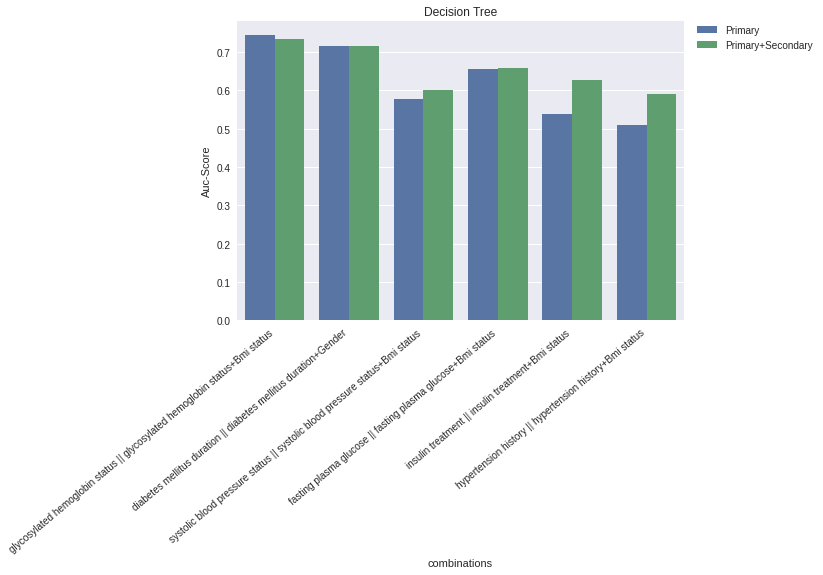

<Figure size 720x576 with 0 Axes>

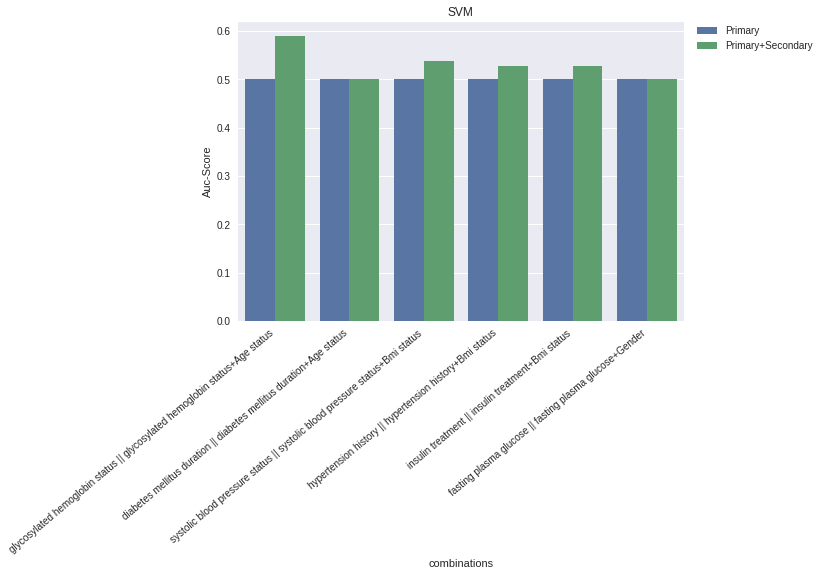

<Figure size 720x576 with 0 Axes>

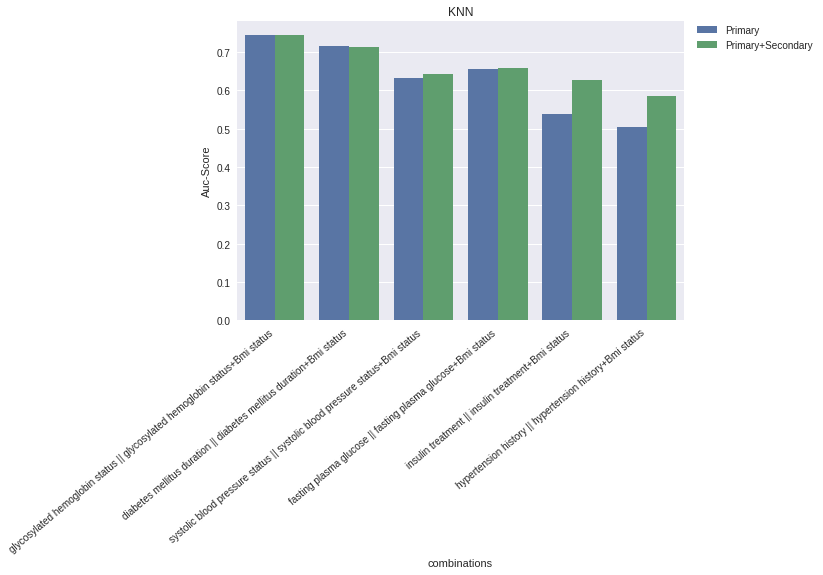

<Figure size 720x576 with 0 Axes>

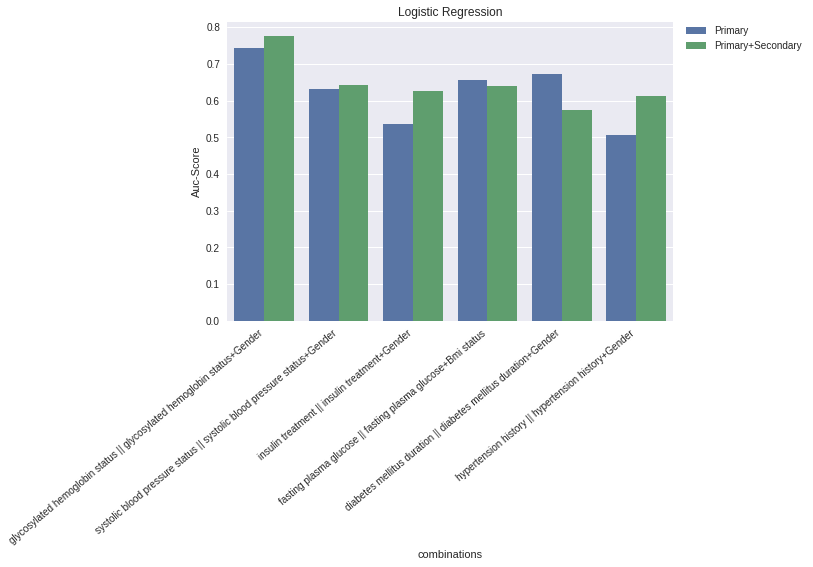

<Figure size 720x576 with 0 Axes>

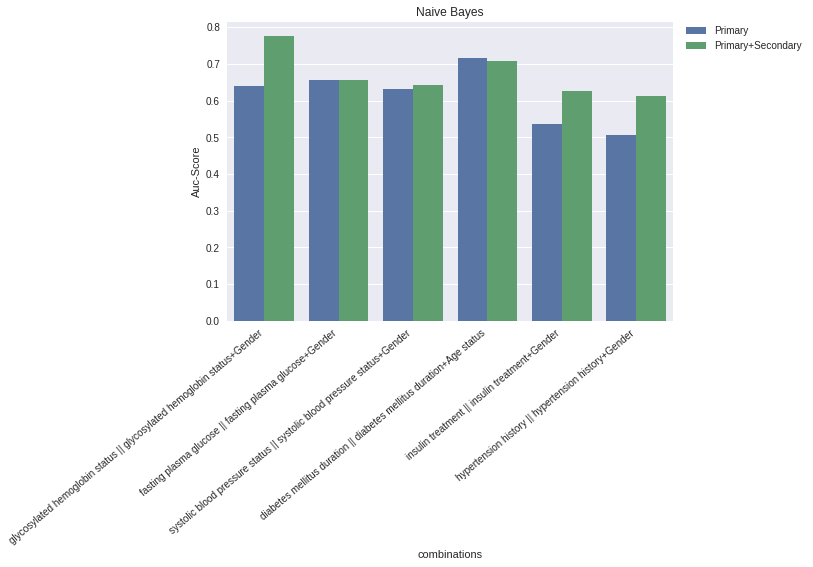

<Figure size 720x576 with 0 Axes>

In [ ]:
for i in pri_sec_combo:
   plt.close()
   plt.title(""+ i)
   Plot_bar_graph(pri_sec_combo[i],models_list[i],best_sec[i])
   plt.figure(figsize=(10,8))
   plt.tight_layout()
   plt.show()
   




**CODE TO FIND BEST F1 SCORE FOR PRIMARY AND SECONDARY COMBINATION FOR EACH MODEL**


F1 Scores of all Models
Decision Tree ----- 0.9090479822745269
SVM ----- 0.7867230410272017
KNN ----- 0.8549934896362047
Logistic Regression ----- 0.7800434038531243
Naive Bayes ----- 0.780821131208728
---------------------###############----------------------------
Best Combinations For F1 Score
Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Gender', 'systolic blood pressure status': 'Bmi status', 'fasting plasma glucose': 'Bmi status', 'insulin treatment': 'Bmi status'}
SVM --  {'glycosylated hemoglobin status': -1, 'diabetes mellitus duration': 'Age status', 'systolic blood pressure status': 'Bmi status', 'hypertension history': 'Bmi status', 'insulin treatment': 'Bmi status', 'fasting plasma glucose': 'Gender'}
KNN --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender'}
Naive Bayes --  {'glycosylated hemoglobin status': 'Ge

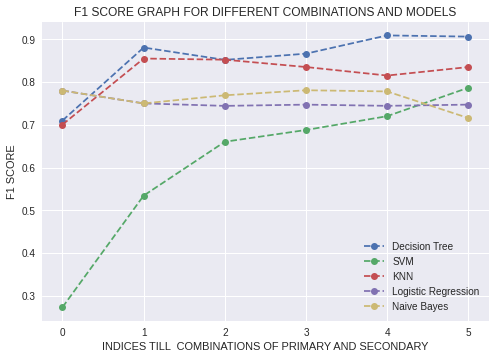

In [ ]:
combo_ind_f1,f1_scores_values=Calculate_metrics("f1")
print("F1 Scores of all Models")
for i in range(len(f1_scores_values)):
   print(model_list_[i],"-----",f1_scores_values[i])
print("---------------------###############----------------------------")   
print("Best Combinations For F1 Score")
for i in combo_ind_f1:
   print(i,"-- ",combo_ind_f1[i] )
print("-----------------GRAPH--------------------")
plt.title('F1 SCORE GRAPH FOR DIFFERENT COMBINATIONS AND MODELS')
# x label
plt.xlabel('INDICES TILL  COMBINATIONS OF PRIMARY AND SECONDARY')
# y label
plt.ylabel('F1 SCORE')
plt.legend(loc='best')
plt.savefig('F1_SOCRE_COMBO',dpi=500)
plt.show()   

**CODE TO FIND BEST AUC SCORE FOR COMBINATION OF  PRIMARY AND SECONDARY FOR EACH MODEL**



AUC Scores of all Models
Decision Tree ----- 0.9108974358974359
SVM ----- 0.8064102564102563
KNN ----- 0.8628205128205128
Logistic Regression ----- 0.7756410256410257
Naive Bayes ----- 0.7788461538461537
---------------------###############----------------------------
Best Combinations For AUC Score
Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Gender', 'systolic blood pressure status': 'Bmi status', 'fasting plasma glucose': 'Bmi status', 'insulin treatment': 'Bmi status'}
SVM --  {'glycosylated hemoglobin status': -1, 'diabetes mellitus duration': 'Age status', 'systolic blood pressure status': 'Bmi status', 'hypertension history': 'Bmi status', 'insulin treatment': 'Bmi status', 'fasting plasma glucose': 'Gender'}
KNN --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender'}
Naive Bayes --  {'glycosylated hemoglobin status': 

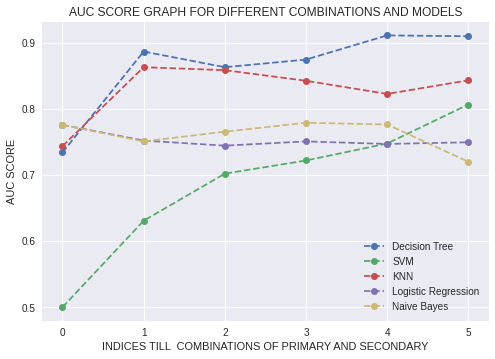

In [ ]:
combo_ind_auc,auc_scores_values=Calculate_metrics("auc")
print("AUC Scores of all Models")
for i in range(len(auc_scores_values)):
   print(model_list_[i],"-----",auc_scores_values[i])
print("---------------------###############----------------------------")   
print("Best Combinations For AUC Score")
for i in combo_ind_auc:
   print(i,"-- ",combo_ind_auc[i] )
print("-----------------GRAPH--------------------")
plt.title('AUC SCORE GRAPH FOR DIFFERENT COMBINATIONS AND MODELS')
# x label
plt.xlabel('INDICES TILL  COMBINATIONS OF PRIMARY AND SECONDARY')
# y label
plt.ylabel('AUC SCORE')
plt.legend(loc='best')
plt.savefig('AUC_SOCRE_COMBO',dpi=300)
plt.show()


**CODE TO FIND BEST ACCURACY FOR COMBINATION OF  PRIMARY AND SECONDARY FOR EACH MODEL**


Accuracy of all Models
Decision Tree ----- 0.9088319088319088
SVM ----- 0.7891737891737892
KNN ----- 0.8547008547008547
Logistic Regression ----- 0.7806267806267806
Naive Bayes ----- 0.7806267806267806
---------------------###############----------------------------
Best Combinations For Accuracy
Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Gender', 'systolic blood pressure status': 'Bmi status', 'fasting plasma glucose': 'Bmi status', 'insulin treatment': 'Bmi status'}
SVM --  {'glycosylated hemoglobin status': -1, 'diabetes mellitus duration': 'Age status', 'systolic blood pressure status': 'Bmi status', 'hypertension history': 'Bmi status', 'insulin treatment': 'Bmi status', 'fasting plasma glucose': 'Gender'}
KNN --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender'}
Naive Bayes --  {'glycosylated hemoglobin status': 'Ge

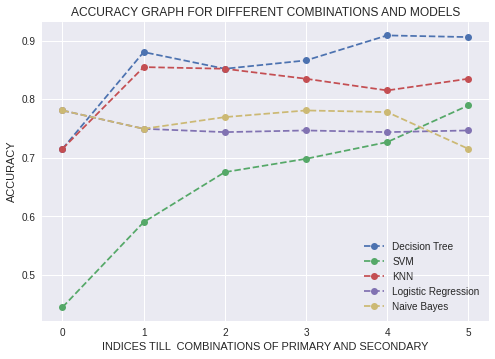

In [ ]:
combo_ind_acc,acc_scores_values=Calculate_metrics("accuracy")
print("Accuracy of all Models")
for i in range(len(acc_scores_values)):
   print(model_list_[i],"-----",acc_scores_values[i])
print("---------------------###############----------------------------")   
print("Best Combinations For Accuracy")
for i in combo_ind_acc:
   print(i,"-- ",combo_ind_acc[i] )
print("-----------------GRAPH--------------------")
plt.title('ACCURACY GRAPH FOR DIFFERENT COMBINATIONS AND MODELS')
# x label
plt.xlabel('INDICES TILL  COMBINATIONS OF PRIMARY AND SECONDARY')
# y label
plt.ylabel('ACCURACY')
plt.legend(loc='best')
plt.savefig('ACCURACY_COMBO',dpi=300)
plt.show()

***CODE TO FIND BEST SENSITIVITY FOR COMBINATION OF  PRIMARY AND SECONDARY FOR EACH MODEL***

Sensitivity Scores of all Models
Decision Tree ----- 0.8923076923076924
SVM ----- 0.6512820512820513
KNN ----- 0.8
Logistic Regression ----- 0.8205128205128205
Naive Bayes ----- 0.8205128205128205
---------------------###############----------------------------
Best Combinations For Sensitivity
Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Gender', 'systolic blood pressure status': 'Bmi status', 'fasting plasma glucose': 'Bmi status', 'insulin treatment': 'Bmi status'}
SVM --  {'glycosylated hemoglobin status': -1, 'diabetes mellitus duration': 'Age status', 'systolic blood pressure status': 'Bmi status', 'hypertension history': 'Bmi status', 'insulin treatment': 'Bmi status', 'fasting plasma glucose': 'Gender'}
KNN --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Bmi status', 'systolic blood pressure status': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender'}
Naive Ba

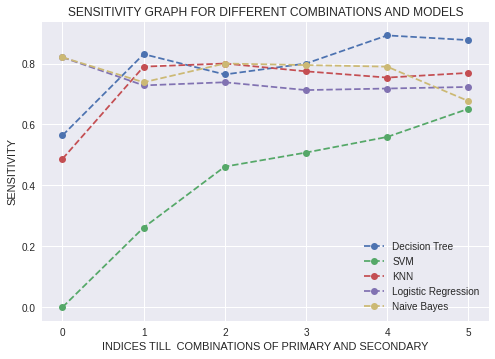

In [ ]:
combo_ind_sensi,sensi_scores_values=Calculate_metrics("sensitivity")
print("Sensitivity Scores of all Models")
for i in range(len(sensi_scores_values)):
   print(model_list_[i],"-----",sensi_scores_values[i])
print("---------------------###############----------------------------")   
print("Best Combinations For Sensitivity")
for i in combo_ind_sensi:
   print(i,"-- ",combo_ind_sensi[i] )
print("-----------------GRAPH--------------------")
plt.title('SENSITIVITY GRAPH FOR DIFFERENT COMBINATIONS AND MODELS')
# x label
plt.xlabel('INDICES TILL  COMBINATIONS OF PRIMARY AND SECONDARY')
# y label
plt.ylabel('SENSITIVITY')
plt.legend(loc='best')
plt.savefig('SENSITIVITY_COMBO',dpi=500)
plt.show()

***CODE TO FIND BEST SPECIFICITY FOR COMBINATION OF  PRIMARY AND SECONDARY FOR EACH MODEL***


Specificity Scores of all Models
Decision Tree ----- 0.9615384615384616
SVM ----- 1.0
KNN ----- 1.0
Logistic Regression ----- 0.7884615384615384
Naive Bayes ----- 0.7628205128205128
---------------------###############----------------------------
Best Combinations For Specificity
Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Gender', 'systolic blood pressure status': 'Bmi status'}
SVM --  {'glycosylated hemoglobin status': -1}
KNN --  {'glycosylated hemoglobin status': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender', 'systolic blood pressure status': 'Gender', 'insulin treatment': 'Gender', 'fasting plasma glucose': 'Bmi status'}
Naive Bayes --  {'glycosylated hemoglobin status': 'Gender', 'fasting plasma glucose': 'Gender'}
-----------------GRAPH--------------------


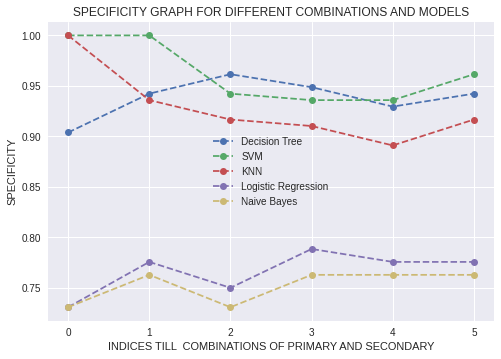

In [ ]:
combo_ind_speci,speci_scores_values=Calculate_metrics("specificity")
print("Specificity Scores of all Models")
for i in range(len(speci_scores_values)):
   print(model_list_[i],"-----",speci_scores_values[i])
print("---------------------###############----------------------------")   
print("Best Combinations For Specificity")
for i in combo_ind_speci:
   print(i,"-- ",combo_ind_speci[i] )
print("-----------------GRAPH--------------------")
plt.title('SPECIFICITY GRAPH FOR DIFFERENT COMBINATIONS AND MODELS')
# x label
plt.xlabel('INDICES TILL  COMBINATIONS OF PRIMARY AND SECONDARY')
# y label
plt.ylabel('SPECIFICITY')
plt.legend(loc='best')
plt.savefig('SPECIFICITY_COMBO',dpi=300)
plt.show()

***CODE TO FIND BEST FALSE POSITIVE RATE FOR COMBINATION OF  PRIMARY AND SECONDARY FOR EACH MODEL***

False Positive Rate Scores of all Models
Decision Tree ----- 0.09615384615384616
SVM ----- 0.0641025641025641
KNN ----- 0.10897435897435898
Logistic Regression ----- 0.2692307692307692
Naive Bayes ----- 0.2692307692307692
---------------------###############----------------------------
Best Combinations For Fasle Positive Rate
Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status'}
SVM --  {'glycosylated hemoglobin status': -1, 'diabetes mellitus duration': 'Age status', 'systolic blood pressure status': 'Bmi status', 'hypertension history': 'Bmi status'}
KNN --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Bmi status', 'systolic blood pressure status': 'Bmi status', 'fasting plasma glucose': 'Bmi status', 'insulin treatment': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender'}
Naive Bayes --  {'glycosylated hemoglobin status': 'Gender'}
-----------------GRAPH--------------------


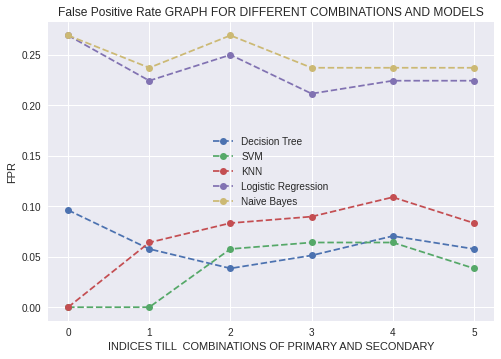

In [ ]:
combo_ind_fpr,fpr_scores_values=Calculate_metrics("false_positive_rate")
print("False Positive Rate Scores of all Models")
for i in range(len(fpr_scores_values)):
   print(model_list_[i],"-----",fpr_scores_values[i])
print("---------------------###############----------------------------")   
print("Best Combinations For Fasle Positive Rate")
for i in combo_ind_fpr:
   print(i,"-- ",combo_ind_fpr[i] )
print("-----------------GRAPH--------------------")
plt.title('False Positive Rate GRAPH FOR DIFFERENT COMBINATIONS AND MODELS')
# x label
plt.xlabel('INDICES TILL  COMBINATIONS OF PRIMARY AND SECONDARY')
# y label
plt.ylabel('FPR')
plt.legend(loc='best')
plt.savefig('FPR_COMBO',dpi=300)
plt.show()


***CODE TO FIND BEST TPR+FPR FOR COMBINATION OF  PRIMARY AND SECONDARY FOR EACH MODEL***

TPR+FPR Scores of all Models
Decision Tree ----- 0.9628205128205128
SVM ----- 0.6897435897435897
KNN ----- 0.8833333333333334
Logistic Regression ----- 1.0897435897435896
Naive Bayes ----- 1.0897435897435896
---------------------###############----------------------------
Best Combinations For TPR+FPR 
Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Gender', 'systolic blood pressure status': 'Bmi status', 'fasting plasma glucose': 'Bmi status', 'insulin treatment': 'Bmi status'}
SVM --  {'glycosylated hemoglobin status': -1, 'diabetes mellitus duration': 'Age status', 'systolic blood pressure status': 'Bmi status', 'hypertension history': 'Bmi status', 'insulin treatment': 'Bmi status', 'fasting plasma glucose': 'Gender'}
KNN --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Bmi status', 'systolic blood pressure status': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender'}


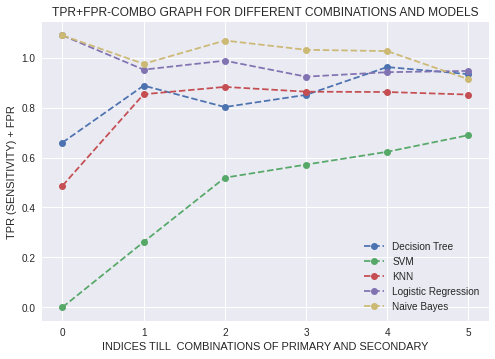

In [ ]:
combo_ind_rocauc,rocauc_scores_values=Calculate_metrics("roc-auc")
print("TPR+FPR Scores of all Models")
for i in range(len(rocauc_scores_values)):
   print(model_list_[i],"-----",rocauc_scores_values[i])
print("---------------------###############----------------------------")   
print("Best Combinations For TPR+FPR ")
for i in combo_ind_rocauc:
   print(i,"-- ",combo_ind_rocauc[i] )
print("-----------------GRAPH--------------------")
plt.title('TPR+FPR-COMBO GRAPH FOR DIFFERENT COMBINATIONS AND MODELS')
# x label
plt.xlabel('INDICES TILL  COMBINATIONS OF PRIMARY AND SECONDARY')
# y label
plt.ylabel('TPR (SENSITIVITY) + FPR')
plt.legend(loc='best')
plt.savefig('TPR+FPR_COMBO',dpi=300)
plt.show()


***CODE TO FIND BEST SENSITIVITY(RECALL) +PRECISION FOR COMBINATION OF  PRIMARY AND SECONDARY FOR EACH MODEL***

Sensitivity+ Precision  Scores of all Models
Decision Tree ----- 1.821794871794872
SVM ----- 1.6128205128205129
KNN ----- 1.7256410256410257
Logistic Regression ----- 1.551282051282051
Naive Bayes ----- 1.5576923076923075
---------------------###############----------------------------
Best Combinations For SENSITIVITY+PRECISION 
Decision Tree --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Gender', 'systolic blood pressure status': 'Bmi status', 'fasting plasma glucose': 'Bmi status', 'insulin treatment': 'Bmi status'}
SVM --  {'glycosylated hemoglobin status': -1, 'diabetes mellitus duration': 'Age status', 'systolic blood pressure status': 'Bmi status', 'hypertension history': 'Bmi status', 'insulin treatment': 'Bmi status', 'fasting plasma glucose': 'Gender'}
KNN --  {'glycosylated hemoglobin status': 'Bmi status', 'diabetes mellitus duration': 'Bmi status'}
Logistic Regression --  {'glycosylated hemoglobin status': 'Gender'}
Naive Bayes --  {'gl

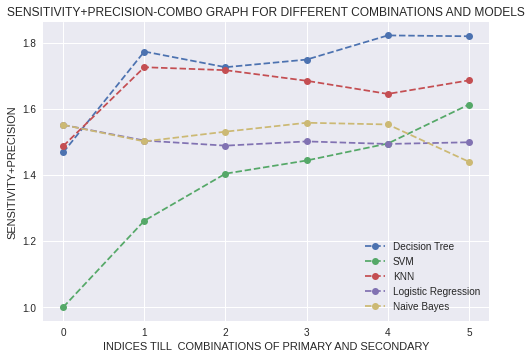

In [ ]:
combo_ind_prerec,prerec_scores_values=Calculate_metrics("prec-rec")
print("Sensitivity+ Precision  Scores of all Models")
for i in range(len(prerec_scores_values)):
   print(model_list_[i],"-----",prerec_scores_values[i])
print("---------------------###############----------------------------")   
print("Best Combinations For SENSITIVITY+PRECISION ")
for i in combo_ind_prerec:
   print(i,"-- ",combo_ind_prerec[i] )
print("-----------------GRAPH--------------------")
plt.title('SENSITIVITY+PRECISION-COMBO GRAPH FOR DIFFERENT COMBINATIONS AND MODELS')
# x label
plt.xlabel('INDICES TILL  COMBINATIONS OF PRIMARY AND SECONDARY')
# y label
plt.ylabel('SENSITIVITY+PRECISION')
plt.legend(loc='best')
plt.savefig('SENSITIVITY+PRECISION_COMBO',dpi=300)
plt.show()


**Graphs of ALL Metrics AUC, F1_SCORE, SENSITIVITY,SPECIFICITY,FALSE POSITIVE RATE**

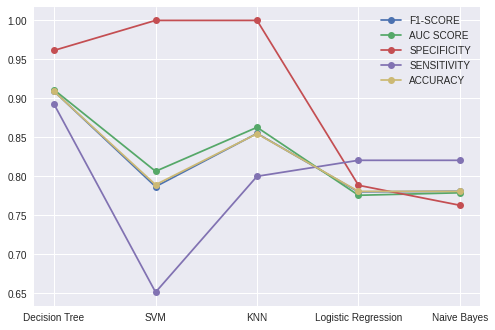

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mdl_names=model_list_
plt.plot(mdl_names,f1_scores_values,linestyle="-", marker="o", label="F1-SCORE")
plt.plot(mdl_names, auc_scores_values, linestyle="-", marker="o", label="AUC SCORE")
plt.plot(mdl_names, speci_scores_values, linestyle="-", marker="o", label="SPECIFICITY")
plt.plot(mdl_names, sensi_scores_values, linestyle="-", marker="o", label="SENSITIVITY")
#plt.plot(mdl_names, fpr_scores_values, linestyle="-", marker="o", label="FPR")
plt.plot(mdl_names, acc_scores_values, linestyle="-", marker="o", label="ACCURACY")
plt.legend()
plt.savefig('COMPARISON OF ALL METRICS',dpi=300)
plt.show()

**CODE TO DRAW ROC-AUC CURVES**

In [ ]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
tr_pve=[] #TO Store True Positives of all models
fs_pve=[] #False Negatives of all models
for i in combo_ind_rocauc:
  X2_train = np.ndarray([])
  X2_test = np.ndarray([])
  t=[]
  #print(i)
  for x in combo_ind_rocauc[i]:
      #print(df.columns.get_loc(x))
      n1=pd.DataFrame(X_test[:,df.columns.get_loc(x)])
      if combo_ind_rocauc[i][x]!=-1:
           n1[1]=X_test[:,df.columns.get_loc(combo_ind_rocauc[i][x])]
      n2=pd.DataFrame(X_train[:,df.columns.get_loc(x)])
      if combo_ind_rocauc[i][x]!=-1:
           n2[1]=X_train[:,df.columns.get_loc(combo_ind_rocauc[i][x])]
      if X2_test.shape==():
          X2_test=n1.to_numpy()
      else:  
          X2_test= np.append(X2_test, n1.to_numpy(), axis=1)   
      if X2_train.shape==():
          X2_train=n2.to_numpy()
      else:  
          X2_train= np.append(X2_train, n2.to_numpy(), axis=1)     
  #print(X2_train.shape)
  #print(X2_test.shape)        
  models_list[i].fit(X2_train, y_train)
  pred_prob=models_list[i].predict_proba(X2_test)
  fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
  tr_pve.append(tpr1) #True positive rate values for eachh model
  fs_pve.append(fpr1) #False Positive rate values for each model

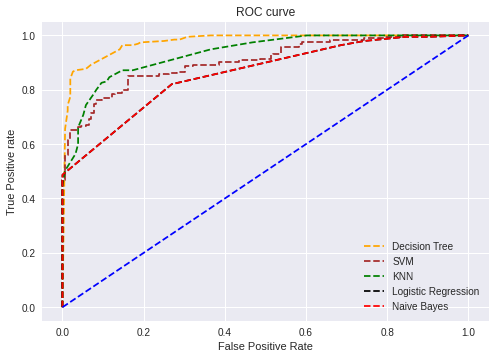

In [ ]:
color=["orange","brown","green","black","red"]
# plot roc curves
for i in range(5):
   plt.plot(fs_pve[i], tr_pve[i], linestyle="--", marker="",color=color[i], label=mdl_names[i])
plt.plot(p_fpr, p_tpr, linestyle="--", marker="", color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC1',dpi=300)
plt.show();

***CODE TO DRAW PRECISION RECALL  CURVE***

In [ ]:
pr=[] #TO Store precision of all models
re=[] #recall of all models
for i in pri_sec_combo:
  X2_train = np.ndarray([])
  X2_test = np.ndarray([])
  t=[]
  #print(i)
  for x in combo_ind_prerec[i]: #Comboindprec is list which stores all combinations whith maximum Precision+recall values.
      #print(df.columns.get_loc(x))
      n1=pd.DataFrame(X_test[:,df.columns.get_loc(x)])
      if combo_ind_prerec[i][x]!=-1:
          n1[1]=X_test[:,df.columns.get_loc(combo_ind_prerec[i][x])]
      n2=pd.DataFrame(X_train[:,df.columns.get_loc(x)])
      if combo_ind_prerec[i][x]!=-1:
          n2[1]=X_train[:,df.columns.get_loc(combo_ind_prerec[i][x])]
      if X2_test.shape==():
          X2_test=n1.to_numpy()
      else:  
          X2_test= np.append(X2_test, n1.to_numpy(), axis=1)   
      if X2_train.shape==():
          X2_train=n2.to_numpy()
      else:  
          X2_train= np.append(X2_train, n2.to_numpy(), axis=1)     
  #print(X2_train.shape)
  #print(X2_test.shape)        
  models_list[i].fit(X2_train, y_train)
  pred_prob=models_list[i].predict_proba(X2_test)
  pr1, re1, thresh1 = metrics.precision_recall_curve(y_test, pred_prob[:,1], pos_label=1)
  pr.append(pr1)
  re.append(re1)

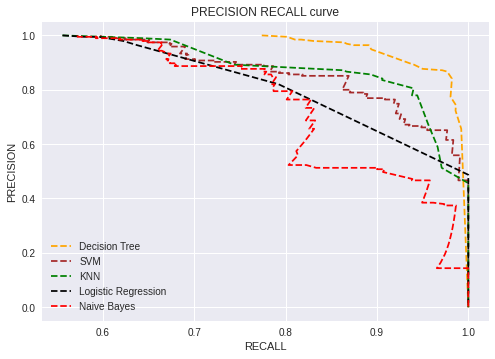

In [ ]:
# plot PRECISION RECALL CURVE
for i in range(5):
   plt.plot(pr[i], re[i], linestyle="--", marker="",color=color[i], label=mdl_names[i])
# title
plt.title('PRECISION RECALL curve')
# x label
plt.xlabel('RECALL')
# y label
plt.ylabel('PRECISION')

plt.legend(loc='best')
plt.savefig('PR_RE',dpi=300)
plt.show();



---

END OF CODE BY REVANTH 13/02/22

---



In [ ]:
#Authenticate Google Drive in case you need to import dataset from there.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd

#Importing  dataset from Google Drivehttps://drive.google.com/file/d/1DIp2YKX0DdXtTbIcTOwY76gaRLlMS8We/view?usp=sharing
downloaded = drive.CreateFile({'id':"16HpvkjLLD44nxYSGvg3UYIV_Mty0XtxV"})   # replace the id with id of file you want to access
downloaded.GetContentFile('proc_data.csv')  
df = pd.read_csv('proc_data.csv')
df['dr_status'] = pd.factorize(df['dr_status'])[0]

downloaded = drive.CreateFile({'id':"1UXl-ztH-RNvjOREU3U8eWZ7xKPSLZ2zL"})   # replace the id with id of file you want to access
downloaded.GetContentFile('cat_or_cont.csv')  
choices_df = pd.read_csv('cat_or_cont.csv')
choices_df.drop('dr_status',axis=1,inplace=True)

df.drop('stdr',axis=1,inplace=True)
#df.drop('ffa',axis=1,inplace=True)


se = df.to_numpy()
X = se[:,0:-1]
y = se[:,-1]
df.drop('dr_status',axis=1,inplace=True)
#print(df)
print(X.shape)
print(y.shape)

ApiRequestError: ignored

In [ ]:
continuous_cols = []
categorical_cols = []
for i in range(0,X.shape[1]):
  curr_ch = choices_df[df.columns[i]][0]
  if curr_ch==2:
    categorical_cols.append(i)
  else:
    continuous_cols.append(i)

print(df.columns[continuous_cols])
print(df.columns[categorical_cols])

In [ ]:
#Storing the list of attribute names.
list_col = list(df.columns)[:]
ls = []
for i in continuous_cols:
  ls.append(list_col[i])
for i in categorical_cols:
  ls.append(list_col[i])
list_col = ls
print(list_col)

In [ ]:
# print(df.shape)
# print(df)

In [ ]:
# !pip install sage
# !pip install sage-importance
!pip install shap

In [ ]:
#Import all necessary libraries
from collections import Counter 
from scipy.sparse import csgraph
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import pyplot
import random
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [ ]:
#Splitting dataset into training and test sets.
X_tr, X_te, Y_train, Y_test = train_test_split(X, y, test_size = 0.20,random_state=0)

In [ ]:
# train, test = train_test_split(df.values, test_size = 0.20,random_state=0)
# # print(train.shape)
# train, val = train_test_split(
#     train, test_size=0.2, random_state=0)

In [ ]:

# Y_train = train[:, -1].copy()
# # print(train[:,-1])
# print(Y_train.shape)
# Y_val = val[:, -1].copy()
# print(Y_val.shape)
# Y_test = test[:, -1].copy()
# print(Y_test.shape)
# X_tr = train[:, :-1].copy()
# print(X_tr.shape)
# X_vl = val[:, :-1].copy()
# print(X_vl.shape)
# X_te = test[:, :-1].copy()
# print(X_te.shape)

In [ ]:
# #Normalizing the data.
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_tr[:,continuous_cols])
# X_train = np.concatenate((X_train,X_tr[:,categorical_cols]),axis=1)
# X_test = scaler.transform(X_te[:,continuous_cols])
# X_test = np.concatenate((X_test,X_te[:,categorical_cols]),axis=1)
# X_val = scaler.transform(X_vl[:,continuous_cols])
# X_val = np.concatenate((X_val,X_vl[:,categorical_cols]),axis=1)
# # print(X_val)
# # print(X_train)
# # print(X_test)

In [ ]:
#Normalizing the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_tr[:,continuous_cols])
X_train = np.concatenate((X_train,X_tr[:,categorical_cols]),axis=1)
X_test = scaler.transform(X_te[:,continuous_cols])
X_test = np.concatenate((X_test,X_te[:,categorical_cols]),axis=1)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
sm_x, sm_y = oversample.fit_resample(X_train, Y_train)

In [ ]:



# # Set up data
# dtrain = xgb.DMatrix(sm_x, label=sm_y)
# dval = xgb.DMatrix(X_val, label=Y_val)

# # Parameters
# param = {
#     'max_depth' : 10,
#     'objective': 'reg:squarederror',
#     'nthread': 4
# }
# evallist = [(dtrain, 'train'), (dval, 'val')]
# num_round = 50

# # Train
# model = xgb.train(param, dtrain, num_round, evallist, verbose_eval=False)
# # Calculate performance
# mean = np.mean(sm_y)
# base_mse = np.mean((mean - Y_test) ** 2)
# mse = np.mean((model.predict(xgb.DMatrix(X_test)) - Y_test) ** 2)

# print('Base rate MSE = {:.2f}'.format(base_mse))
# print('Model MSE = {:.2f}'.format(mse))

# # Setup and calculate
# imputer = sage.MarginalImputer(model, X_test[:10])
# estimator = sage.PermutationEstimator(imputer, 'mse')
# sage_values = estimator(X_test, Y_test)

# feature_names = df.columns.tolist()[:]

# # Plot results
# sage_values.plot(feature_names,figsize=(50, 40), capsize=20,label_size=26, return_fig=False)

import shap  # package used to calculate Shap values
shap.initjs()
data = shap.kmeans(sm_x, 100)
DT = DecisionTreeClassifier(splitter='best', random_state=0, min_samples_split=2, max_features='sqrt', max_depth=9, criterion='gini')
DT.fit(sm_x,sm_y)
# use Kernel SHAP to explain test set predictions
explainer_dt = shap.KernelExplainer(DT.predict_proba, data)
shap_values_dt = explainer_dt.shap_values(X_test, nsamples=100)
# print(shap_values_dt)

svm = SVC(tol=0.0001, random_state=0, kernel='poly', gamma=0.1, degree=2, class_weight='balanced', C=10,probability=True)
svm.fit(sm_x,sm_y)
# use Kernel SHAP to explain test set predictions
explainer_svm = shap.KernelExplainer(svm.predict_proba, data)
shap_values_svm = explainer_svm.shap_values(X_test, nsamples=100)
# print(shap_values_svm)

KNN = KNeighborsClassifier(weights='uniform', p=2, n_neighbors=20, metric='manhattan', leaf_size=49, algorithm='ball_tree')
KNN.fit(sm_x,sm_y)
# use Kernel SHAP to explain test set predictions
explainer_knn = shap.KernelExplainer(KNN.predict_proba, data)
shap_values_knn = explainer_knn.shap_values(X_test, nsamples=100)
# print(shap_values_knn)

   
LR = LogisticRegression(warm_start=True, tol=0.009, solver='saga', random_state=0, penalty='none', multi_class='auto', 
                max_iter=500, intercept_scaling=70, fit_intercept=True, dual=False, class_weight='None', C=1)
LR.fit(sm_x,sm_y)
explainer_lr = shap.KernelExplainer(LR.predict_proba, data)
shap_values_lr = explainer_lr.shap_values(X_test, nsamples=100)
# print(shap_values_lr)


NB = GaussianNB(var_smoothing=1e-10)
NB.fit(sm_x,sm_y)
explainer_nb = shap.KernelExplainer(NB.predict_proba, data)
shap_values_nb = explainer_nb.shap_values(X_test, nsamples=100)
# print(shap_values_nb)

In [ ]:
X_test_df = pd.DataFrame(X_test, columns = ['literacy', 'ses', 'age', 'fbs', 'sbp', 'dbp', 'dm_dur', 'bmi', 'hba1c', 'pp', 'map', 'gender', 'diabetic_status', 
                                            'dm_dur_cat', 'diet_control', 'oha', 'insulin', 'htn', 'cv', 'ffa', 'csme', 'fbs_cat', 'kd_nd', 'smoking_status', 
                                            'typeofdm', 'dme_odpresentabsent', 'csme_ospresentabsent', 'urineforproteinuria', 'age_cat', 'bmi_cat', 'fbs_cat_new', 
                                            'bmi_cat_new', 'kd_nd_1', 'sbp_cat', 'dbp_cat', 'hba1c_cat', 'hba1c_cat_new', 'restype', 'sbp_cat_new', 'dbp_cat_new', 'pp_cat', 'map_cat', 'htn_new'])

In [ ]:
vals_dt = np.abs(shap_values_dt).mean(0)
shap_importance_dt = pd.DataFrame(list(zip(X_test_df.columns, sum(vals_dt))), columns=['col_name','shap_importance_vals'])
shap_importance_dt.sort_values(by=['shap_importance_vals'], ascending=False, inplace=True)
# print(shap_importance_dt)

vals_svm = np.abs(shap_values_svm).mean(0)
shap_importance_svm = pd.DataFrame(list(zip(X_test_df.columns, sum(vals_svm))), columns=['col_name','shap_importance_vals'])
shap_importance_svm.sort_values(by=['shap_importance_vals'], ascending=False, inplace=True)
# print(shap_importance_svm)

vals_knn = np.abs(shap_values_knn).mean(0)
shap_importance_knn = pd.DataFrame(list(zip(X_test_df.columns, sum(vals_knn))), columns=['col_name','shap_importance_vals'])
shap_importance_knn.sort_values(by=['shap_importance_vals'], ascending=False, inplace=True)
# print(shap_importance_dt)

vals_lr = np.abs(shap_values_lr).mean(0)
shap_importance_lr = pd.DataFrame(list(zip(X_test_df.columns, sum(vals_lr))), columns=['col_name','shap_importance_vals'])
shap_importance_lr.sort_values(by=['shap_importance_vals'], ascending=False, inplace=True)
# print(shap_importance_lr)

vals_nb = np.abs(shap_values_nb).mean(0)
shap_importance_nb = pd.DataFrame(list(zip(X_test_df.columns, sum(vals_nb))), columns=['col_name','shap_importance_vals'])
shap_importance_nb.sort_values(by=['shap_importance_vals'], ascending=False, inplace=True)
# print(shap_importance_nb)

In [ ]:


num_attrs = X.shape[1]

rank_attr_dt = []
rank_attr_dt = np.argsort(shap_importance_dt.shap_importance_vals)
# print(rank_attr_dt)

rank_attr_svm = []
rank_attr_svm = np.argsort(shap_importance_svm.shap_importance_vals)
# print(rank_attr_svm)

rank_attr_knn = []
rank_attr_knn = np.argsort(shap_importance_knn.shap_importance_vals)
# print(rank_attr_knn)

rank_attr_lr = []
rank_attr_lr = np.argsort(shap_importance_lr.shap_importance_vals)
# print(rank_attr_lr)

rank_attr_nb = []
rank_attr_nb = np.argsort(shap_importance_nb.shap_importance_vals)
# print(rank_attr_nb)

In [ ]:
dt_weights = np.zeros(num_attrs)
i = 1
for r in rank_attr_dt:
    dt_weights[r] = num_attrs - i
    i+=1

svm_weights = np.zeros(num_attrs)
i = 1
for r in rank_attr_svm:
    svm_weights[r] = num_attrs - i
    i+=1

knn_weights = np.zeros(num_attrs)
i = 1
for r in rank_attr_knn:
    knn_weights[r] = num_attrs - i
    i+=1

lr_weights = np.zeros(num_attrs)
i = 1
for r in rank_attr_lr:
    lr_weights[r] = num_attrs - i
    i+=1

nb_weights = np.zeros(num_attrs)
i = 1
for r in rank_attr_nb:
    nb_weights[r] = num_attrs - i
    i+=1


In [ ]:
from sklearn.model_selection import cross_val_score
svm_fe = []
dt_fe = []
knn_fe = []
lr_fe = []
nb_fe = []
prev_s1 = 0
prev_s2 = 0
prev_s3 = 0
prev_s6 = 0
prev_s8 = 0
for i in range(num_attrs):
    print("Model where "+str(i+1)+" most important variables have been considered (removing unimportant variables):")
    
    svm_fe.append(rank_attr_svm[i])
    dt_fe.append(rank_attr_dt[i])
    knn_fe.append(rank_attr_knn[i])
    lr_fe.append(rank_attr_lr[i])
    nb_fe.append(rank_attr_nb[i])
    
    model_dt = DecisionTreeClassifier(splitter='best', random_state=0, min_samples_split=2, max_features='sqrt', max_depth=9, criterion='gini')
    # model1.fit(sm_x[:,dt_fe],sm_y)
    # score1 = model1.score(sm_x[:,dt_fe],sm_y)
    score1 = cross_val_score(model_dt, sm_x[:,dt_fe], sm_y, cv=5,scoring='roc_auc').mean()
    if prev_s1 >= score1:
      dt_weights[rank_attr_dt[i]] = 0
      dt_fe.pop()
    else:
      prev_s1 = score1

    model_svm = SVC(tol=0.0001, random_state=0, kernel='poly', gamma=0.1, degree=2, class_weight='balanced', C=10)
    # model2.fit(sm_x[:,svm_fe],sm_y)
    # score2 = model2.score(sm_x[:,svm_fe],sm_y)
    score2 = cross_val_score(model_svm, sm_x[:,svm_fe], sm_y, cv=5,scoring='roc_auc').mean()
    if prev_s2 >= score2:
      svm_weights[rank_attr_svm[i]] = 0
      svm_fe.pop()
    else:
      prev_s2 = score2

    model_knn = KNeighborsClassifier(weights='uniform', p=2, n_neighbors=20, metric='manhattan', leaf_size=49, algorithm='ball_tree')
    # model3.fit(sm_x[:,knn_fe],sm_y)
    # score3 = model3.score(sm_x[:,knn_fe],sm_y)
    score3 = cross_val_score(model_knn, sm_x[:,knn_fe], sm_y, cv=5,scoring='roc_auc').mean()
    if prev_s3 >= score3:
      knn_weights[rank_attr_knn[i]] = 0
      knn_fe.pop()
    else:
      prev_s3 = score3
   
    model_lr = LogisticRegression(warm_start=True, tol=0.009, solver='saga', random_state=0, penalty='none', multi_class='auto', 
                max_iter=500, intercept_scaling=70, fit_intercept=True, dual=False, class_weight='None', C=1)
    # model6.fit(sm_x[:,lr_fe],sm_y)
    # score6 = model6.score(sm_x[:,lr_fe],sm_y)
    score6 = cross_val_score(model_lr, sm_x[:,lr_fe], sm_y, cv=5,scoring='roc_auc').mean()
    if prev_s6 >= score6:
      lr_weights[rank_attr_lr[i]] = 0
      lr_fe.pop()
    else:
      prev_s6 = score6

    model_nb = GaussianNB(var_smoothing=1e-10)
    # model7.fit(sm_x[:,ann_fe],sm_y)
    # score7 = model7.score(sm_x[:,ann_fe],sm_y)
    score8 = cross_val_score(model_nb, sm_x[:,nb_fe], sm_y, cv=5,scoring='roc_auc').mean()
    if prev_s8 >= score8:
      nb_weights[rank_attr_nb[i]] = 0
      nb_fe.pop()
    else:
      prev_s8 = score8


    print("Decision Tree AUC = "+ str(score1))
    print([list_col[i] for i in dt_fe])
    print("SVM AUC = " + str(score2))
    print([list_col[i] for i in svm_fe])
    print("KNN AUC = " + str(score3))
    print([list_col[i] for i in knn_fe])
    print("Logistic Regression AUC = "+ str(score6))
    print([list_col[i] for i in lr_fe])
    print("Naive Bayes AUC = "+ str(score8))
    print([list_col[i] for i in lr_fe])
    print()

In [ ]:

dec_order_of_importance_dt=(np.argsort(dt_weights, kind = 'stable')[::-1])

dec_order_of_importance_svm=(np.argsort(svm_weights, kind = 'stable')[::-1])

dec_order_of_importance_knn=(np.argsort(knn_weights, kind = 'stable')[::-1])

dec_order_of_importance_lr=(np.argsort(lr_weights, kind = 'stable')[::-1])

dec_order_of_importance_nb=(np.argsort(nb_weights, kind = 'stable')[::-1])

print("Order of importance of features for Decision  tree :")
for r in dec_order_of_importance_dt:
    print(list_col[r]) 
print("Order of importance of features for SVM :")
for r in dec_order_of_importance_svm:
    print(list_col[r])
print("Order of importance of features for KNN :")
for r in dec_order_of_importance_knn:
    print(list_col[r])
print("Order of importance of features for Logistic Regression :")
for r in dec_order_of_importance_lr:
    print(list_col[r])
print("Order of importance of features for Naive Bayes :")
for r in dec_order_of_importance_nb:
    print(list_col[r])
print() 

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 


f1 = []
auc = []
acc = []


for i in range(num_attrs):
    model1 = DecisionTreeClassifier(splitter='best', random_state=0, min_samples_split=2, max_features='sqrt', max_depth=9, criterion='gini')
    model1.fit(sm_x[:,dec_order_of_importance_dt[0:i+1]],sm_y)
    pred = model1.predict(X_test[:,dec_order_of_importance_dt[0:i+1]])
    dec = model1.predict_proba(X_test[:,dec_order_of_importance_dt[0:i+1]])
    try:  
      auc.append( roc_auc_score(Y_test,dec[:,1]) )
      f1.append( f1_score(Y_test,pred) )
    except:
      pass
    acc.append( model1.score(X_test[:,dec_order_of_importance_dt[0:i+1]] , Y_test) )

plt.figure()
if len(f1)>0:
    plt.plot([(i+1) for i in range(num_attrs)],f1, label = "F1", color='yellow', linewidth = 3, 
         marker='o', markerfacecolor='green', markersize=5)
if len(auc)>0:
    plt.plot([(i+1) for i in range(num_attrs)],auc, label = "AUC", color='orange', linewidth = 3, 
         marker='o', markerfacecolor='red', markersize=5)
plt.plot([(i+1) for i in range(num_attrs)],acc, label = "Accuracy", color='cyan', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5)  
plt.xlabel('Number of features')
plt.ylabel('Score')
plt.title('Decision Tree Model ')
plt.legend()
plt.show()

print("Decision Tree Model :")
if len(f1)>0:
    print("Maximum F1 Score = "+str(max(f1))+"\t\tat Number of Attributes = "+str(1+np.argmax(f1)))
if len(auc)>0:
    print("Maximum AUC = "+str(max(auc))+"\t\tat Number of Attributes = "+str(1+np.argmax(auc)))
print("Maximum Accuracy = "+str(max(acc))+"\t\tat Number of Attributes = "+str(1+np.argmax(acc)))


f1 = []
auc = []
acc = []



  
for i in range(num_attrs):
    model2 = SVC(tol=0.0001, random_state=0, kernel='poly', gamma=0.1, degree=2, class_weight='balanced', C=10)
    model2.fit(sm_x[:,dec_order_of_importance_svm[0:i+1]],sm_y)
    pred = model2.predict(X_test[:,dec_order_of_importance_svm[0:i+1]])
    dec = model2.decision_function(X_test[:,dec_order_of_importance_svm[0:i+1]])
    try:
      auc.append( roc_auc_score(Y_test,dec) )
      f1.append( f1_score(Y_test,pred) )
    except:
      pass
    acc.append( model2.score(X_test[:,dec_order_of_importance_svm[0:i+1]] , Y_test) )

plt.figure()
if len(f1)>0:
    plt.plot([(i+1) for i in range(num_attrs)],f1, label = "F1", color='yellow', linewidth = 3, 
         marker='o', markerfacecolor='green', markersize=5)
if len(auc)>0:
    plt.plot([(i+1) for i in range(num_attrs)],auc, label = "AUC", color='orange', linewidth = 3, 
         marker='o', markerfacecolor='red', markersize=5) 
plt.plot([(i+1) for i in range(num_attrs)],acc, label = "Accuracy", color='cyan', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5) 
plt.xlabel('Number of features')
plt.ylabel('Score')
plt.title('SVM Model ')
plt.legend()
plt.show()

print("SVM Model  :")
if len(f1)>0:
    print("Maximum F1 Score = "+str(max(f1))+"\t\tat Number of Attributes = "+str(1+np.argmax(f1)))
if len(auc)>0:
    print("Maximum AUC = "+str(max(auc))+"\t\tat Number of Attributes = "+str(1+np.argmax(auc)))
print("Maximum Accuracy = "+str(max(acc))+"\t\tat Number of Attributes = "+str(1+np.argmax(acc)))









f1 = []
auc = []
acc = []


for i in range(num_attrs): 
    model3 = KNeighborsClassifier(weights='uniform', p=2, n_neighbors=20, metric='manhattan', leaf_size=49, algorithm='ball_tree')
    model3.fit(sm_x[:,dec_order_of_importance_knn[0:i+1]],sm_y)
    pred = model3.predict(X_test[:,dec_order_of_importance_knn[0:i+1]])
    dec = model3.predict_proba(X_test[:,dec_order_of_importance_knn[0:i+1]])
    try:
      auc.append( roc_auc_score(Y_test,dec[:,1]) )
      f1.append( f1_score(Y_test,pred) )
    except:
      pass
    acc.append( model3.score(X_test[:,dec_order_of_importance_knn[0:i+1]] , Y_test) )

plt.figure()
if len(f1)>0:
    plt.plot([(i+1) for i in range(num_attrs)],f1, label = "F1", color='yellow', linewidth = 3, 
         marker='o', markerfacecolor='green', markersize=5)
if len(auc)>0:
    plt.plot([(i+1) for i in range(num_attrs)],auc, label = "AUC", color='orange', linewidth = 3, 
         marker='o', markerfacecolor='red', markersize=5) 
plt.plot([(i+1) for i in range(num_attrs)],acc, label = "Accuracy", color='cyan', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5) 
plt.xlabel('Number of features')
plt.ylabel('Score')
plt.title('KNN Model ')
plt.legend()
plt.show()

print("KNN Model :")
if len(f1)>0:
    print("Maximum F1 Score = "+str(max(f1))+"\t\tat Number of Attributes = "+str(1+np.argmax(f1)))
if len(auc)>0:
    print("Maximum AUC = "+str(max(auc))+"\t\tat Number of Attributes = "+str(1+np.argmax(auc)))
print("Maximum Accuracy = "+str(max(acc))+"\t\tat Number of Attributes = "+str(1+np.argmax(acc)))



f1 = []
auc = []
acc = []

for i in range(num_attrs):
    model6 = LogisticRegression(warm_start=True, tol=0.009, solver='saga', random_state=0, penalty='none', multi_class='auto', 
                max_iter=500, intercept_scaling=70, fit_intercept=True, dual=False, class_weight='None', C=1)
    model6.fit(sm_x[:,dec_order_of_importance_lr[0:i+1]],sm_y)
    pred = model6.predict(X_test[:,dec_order_of_importance_lr[0:i+1]])
    dec = model6.predict_proba(X_test[:,dec_order_of_importance_lr[0:i+1]])
    try:  
      auc.append( roc_auc_score(Y_test,dec[:,1]) )
      f1.append( f1_score(Y_test,pred) )
    except:
      pass
    acc.append( model6.score(X_test[:,dec_order_of_importance_lr[0:i+1]] , Y_test) )

plt.figure()
if len(f1)>0:
    plt.plot([(i+1) for i in range(num_attrs)],f1, label = "F1", color='yellow', linewidth = 3, 
         marker='o', markerfacecolor='green', markersize=5)
if len(auc)>0:
    plt.plot([(i+1) for i in range(num_attrs)],auc, label = "AUC", color='orange', linewidth = 3, 
         marker='o', markerfacecolor='red', markersize=5)
plt.plot([(i+1) for i in range(num_attrs)],acc, label = "Accuracy", color='cyan', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5)  
plt.xlabel('Number of features')
plt.ylabel('Score')
plt.title('LogisticRegression ')
plt.legend()
plt.show()

print("LogisticRegression Model:")
if len(f1)>0:
    print("Maximum F1 Score = "+str(max(f1))+"\t\tat Number of Attributes = "+str(1+np.argmax(f1)))
if len(auc)>0:
    print("Maximum AUC = "+str(max(auc))+"\t\tat Number of Attributes = "+str(1+np.argmax(auc)))
print("Maximum Accuracy = "+str(max(acc))+"\t\tat Number of Attributes = "+str(1+np.argmax(acc)))



f1 = []
auc = []
acc = []


for i in range(num_attrs):
    model8 = GaussianNB(var_smoothing=1e-10)
    model8.fit(sm_x[:,dec_order_of_importance_nb[0:i+1]],sm_y)
    pred = model8.predict(X_test[:,dec_order_of_importance_nb[0:i+1]])
    dec = model8.predict_proba(X_test[:,dec_order_of_importance_nb[0:i+1]])
    try:  
      auc.append( roc_auc_score(Y_test,dec[:,1]) )
      f1.append( f1_score(Y_test,pred) )
    except:
      pass
    acc.append( model8.score(X_test[:,dec_order_of_importance_nb[0:i+1]] , Y_test) )

plt.figure()
if len(f1)>0:
    plt.plot([(i+1) for i in range(num_attrs)],f1, label = "F1", color='yellow', linewidth = 3, 
         marker='o', markerfacecolor='green', markersize=5)
if len(auc)>0:
    plt.plot([(i+1) for i in range(num_attrs)],auc, label = "AUC", color='orange', linewidth = 3, 
         marker='o', markerfacecolor='red', markersize=5)
plt.plot([(i+1) for i in range(num_attrs)],acc, label = "Accuracy", color='cyan', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5)  
plt.xlabel('Number of features')
plt.ylabel('Score')
plt.title('Naive Bayes ')
plt.legend()
plt.show()

print("Naive Bayes Model:")
if len(f1)>0:
    print("Maximum F1 Score = "+str(max(f1))+"\t\tat Number of Attributes = "+str(1+np.argmax(f1)))
if len(auc)>0:
    print("Maximum AUC = "+str(max(auc))+"\t\tat Number of Attributes = "+str(1+np.argmax(auc)))
print("Maximum Accuracy = "+str(max(acc))+"\t\tat Number of Attributes = "+str(1+np.argmax(acc)))

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
model1 = DecisionTreeClassifier(splitter='best', random_state=0, min_samples_split=2, max_features='sqrt', max_depth=9, criterion='gini')
model1.fit(sm_x,sm_y)
pred = model1.predict(X_test)
dec = model1.predict_proba(X_test)
print("Pure Decision Tree Model on data with  with SMOTE :")
print("F1 Score = "+str(f1_score(Y_test,pred)))
print("AUC = "+str(roc_auc_score(Y_test,dec[:,1])))
print("Accuracy = "+str(model1.score(X_test , Y_test)))
print()
model2 = SVC(tol=0.0001, random_state=0, kernel='poly', gamma=0.1, degree=2, class_weight='balanced', C=10)
model2.fit(sm_x,sm_y)
pred = model2.predict(X_test)
dec = model2.decision_function(X_test)
print("Pure SVM Model on data with  with SMOTE :")
print("F1 Score = "+str(f1_score(Y_test,pred)))
print("AUC = "+str(roc_auc_score(Y_test,dec)))
print("Accuracy = "+str(model2.score(X_test , Y_test)))
print()
model3 = KNeighborsClassifier(weights='uniform', p=2, n_neighbors=20, metric='manhattan', leaf_size=49, algorithm='ball_tree')
model3.fit(sm_x,sm_y)
pred = model3.predict(X_test)
dec = model3.predict_proba(X_test)
print("Pure KNN Model on data with  SMOTE :")
print("F1 Score = "+str(f1_score(Y_test,pred)))
print("AUC = "+str(roc_auc_score(Y_test,dec[:,1])))
print("Accuracy = "+str(model3.score(X_test , Y_test)))
print()
model6 = LogisticRegression(warm_start=True, tol=0.009, solver='saga', random_state=0, penalty='none', multi_class='auto', 
                max_iter=500, intercept_scaling=70, fit_intercept=True, dual=False, class_weight='None', C=1)
model6.fit(sm_x,sm_y)
pred = model6.predict(X_test)
dec = model6.predict_proba(X_test)
print("Pure LogisticRegression Model on data with  SMOTE :")
print("F1 Score = "+str(f1_score(Y_test,pred)))
print("AUC = "+str(roc_auc_score(Y_test,dec[:,1])))
print("Accuracy = "+str(model6.score(X_test , Y_test)))
print()
model8 = GaussianNB(var_smoothing=1e-10)
model8.fit(sm_x,sm_y)
pred = model8.predict(X_test)
dec = model8.predict_proba(X_test)
print("Pure Naive Bayes Model on data with  SMOTE :")
print("F1 Score = "+str(f1_score(Y_test,pred)))
print("AUC = "+str(roc_auc_score(Y_test,dec[:,1])))
print("Accuracy = "+str(model8.score(X_test , Y_test)))
print()